## Read datasets and Exploratory Data Analysis

In [4]:
import pandas as pd

# Read datasets
df = pd.read_csv('cyberbullying_tweets.csv', header=None, on_bad_lines='skip')
df.columns = ['tweet', 'cyberbullying_type']
df

,tweet,cyberbullying_type
0,tweet_text,cyberbullying_type
1,"In other words #katandandre, your food was cra...",not_cyberbullying
2,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
3,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
4,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
...,...,...
47688,"Black ppl aren't expected to do anything, depe...",ethnicity
47689,Turner did not withhold his disappointment. Tu...,ethnicity
47690,I swear to God. This dumb nigger bitch. I have...,ethnicity
47691,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [5]:
# Drop first row because the label is treated as data
df = df.iloc[1:, :]
df

,tweet,cyberbullying_type
1,"In other words #katandandre, your food was cra...",not_cyberbullying
2,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
3,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
4,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
5,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47688,"Black ppl aren't expected to do anything, depe...",ethnicity
47689,Turner did not withhold his disappointment. Tu...,ethnicity
47690,I swear to God. This dumb nigger bitch. I have...,ethnicity
47691,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [6]:
# See tweet samples
df.sample(10)

,tweet,cyberbullying_type
8308,@rvikander What's he fighting for? Gays feelin...,gender
44951,Idc that Kanye is black. He is a rich celebrit...,ethnicity
24664,@SusanSaundersJZ @klout must be Cyber Bully! ...,other_cyberbullying
4328,Thanks Pete!! Totally don't feel bad about usi...,not_cyberbullying
995,@AlitaMillanir Quizas no sabes lo que es tene...,not_cyberbullying
18439,Don't be an idiot. Where did religion come int...,religion
19344,"@semzyxx @NAInfidels @owais00 Furthermore, you...",religion
31414,I've seen support from places I didn't expect ...,other_cyberbullying
42062,“@PastelWhite666: niggers are why america have...,ethnicity
35514,Girl....I cannot WAIIIIT to go to my high scho...,age


In [7]:
# See tweet sample
tweet_id = 774
sampletweet = df.iloc[tweet_id]
print("Tweet: {}".format(sampletweet["tweet"]))
print("Cyberbullying type: {}".format(sampletweet["cyberbullying_type"]))

Tweet: [16] This kitchen invention takes away the worst thing about peeling fruit #realtime https://t.co/RJtBZp4cNA https://t.co/LJvyHP0n6u
Cyberbullying type: not_cyberbullying


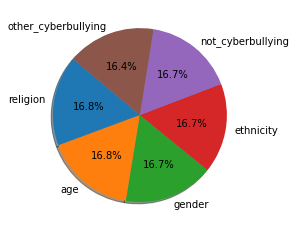

In [8]:
# See simple visualisation
import matplotlib.pyplot as plt
type_count = df['cyberbullying_type'].value_counts()
plt.pie(type_count, labels=type_count.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

In [9]:
# Do one hot encoding because the label is categorical
cyberbullying_type = pd.get_dummies(df.cyberbullying_type)
new_df = pd.concat([df, cyberbullying_type], axis=1)
new_df = new_df.drop(columns='cyberbullying_type')
new_df

,tweet,age,ethnicity,gender,not_cyberbullying,other_cyberbullying,religion
1,"In other words #katandandre, your food was cra...",0,0,0,1,0,0
2,Why is #aussietv so white? #MKR #theblock #ImA...,0,0,0,1,0,0
3,@XochitlSuckkks a classy whore? Or more red ve...,0,0,0,1,0,0
4,"@Jason_Gio meh. :P thanks for the heads up, b...",0,0,0,1,0,0
5,@RudhoeEnglish This is an ISIS account pretend...,0,0,0,1,0,0
...,...,...,...,...,...,...,...
47688,"Black ppl aren't expected to do anything, depe...",0,1,0,0,0,0
47689,Turner did not withhold his disappointment. Tu...,0,1,0,0,0,0
47690,I swear to God. This dumb nigger bitch. I have...,0,1,0,0,0,0
47691,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,0,1,0,0,0,0


## Create function to clean tweets with regex

In [10]:
pip install emoji --upgrade

     |████████████████████████████████| 174 kB 5.3 MB/s 
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=88f86aa77002a087402c9152a23433b48dc40848277a0438c918d8d7b2559162
  Stored in directory: /root/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f580eade
Successfully built emoji


In [11]:
import emoji
# Handle Emoji
def demojize(tweet):
  tweet = emoji.demojize(tweet)
  return tweet


In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [13]:
# Twitter Features
# Handle RT tag
def replace_retweet(tweet, default_replace=""):
  tweet = re.sub('RT\s+', default_replace, tweet)
  return tweet

# Handle user tag
def replace_user(tweet, default_replace=""):
  tweet = re.sub('\B@\w+', default_replace, tweet)
  return tweet

# Handle URL
def replace_url(tweet, default_replace=""):
  tweet = re.sub('(http|https):\/\/\S+', default_replace, tweet)
  return tweet

# Handle hashtag
def replace_hashtag(tweet, default_replace=""):
  tweet = re.sub('#+', default_replace, tweet)
  return tweet

# Word Features
# Handle case
def to_lowercase(tweet):
  tweet = tweet.lower()
  return tweet

# Handle word repetion
def word_repetition(tweet):
  tweet = re.sub(r'(.)\1+', r'\1\1', tweet)
  return tweet

# Handle Punctuation repetition
def punct_repetition(tweet, default_replace=""):
  tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])', default_replace, tweet)
  return tweet

# Stopwords removal
stop_words = set(stopwords.words('english'))
# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

# Word lemmitization
lemmatizer = WordNetLemmatizer()
def lemmatization(text):
    lem = [lemmatizer.lemmatize(w) for w in text.split()]
    return ' '.join(lem)

In [14]:
# Create combined processed function by using all previous functions
def process_tweet(tweet, verbose=False):
  if verbose: print("Initial tweet: {}".format(tweet))

  ## Twitter Features
  tweet = replace_retweet(tweet) # replace retweet
  tweet = replace_user(tweet, "") # replace user tag
  tweet = replace_url(tweet) # replace url
  tweet = replace_hashtag(tweet) # replace hashtag
  tweet = demojize(tweet) # replace emoji
  if verbose: print("Post Twitter processing tweet: {}".format(tweet))

  ## Word Features
  tweet = to_lowercase(tweet) # replace wordcase
  tweet = punct_repetition(tweet) # replace punctuation repetition
  tweet = word_repetition(tweet) # replace word repetition\
  tweet = remove_stopwords(tweet) # stopword removal
  tweet = lemmatization(tweet) # word lemmitization
  if verbose: print("Post Word processing tweet: {}".format(tweet))

  return tweet

In [15]:
# Test out tweet cleaner function
test_text = sampletweet['tweet']
print(process_tweet(test_text, verbose=False))

[16] kitchen invention take away worst thing peeling fruit realtime


In [16]:
# Apply tweet cleaner function to datasets
df['tweet'] = df['tweet'].apply(process_tweet)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tweet,cyberbullying_type
1,"word katandandre, food crapilicious! mkr",not_cyberbullying
2,aussietv white? mkr theblock imacelebrityau to...,not_cyberbullying
3,classy whore? red velvet cupcakes?,not_cyberbullying
4,"meh. :p thanks head up, concerned another angr...",not_cyberbullying
5,isi account pretending kurdish account. like i...,not_cyberbullying
...,...,...
47688,"black ppl expected anything, depended anything...",ethnicity
47689,turner withhold disappointment. turner called ...,ethnicity
47690,swear god. dumb nigger bitch. got bleach hair ...,ethnicity
47691,"yea fuck : youre nigger fucking unfollow me, f...",ethnicity


In [17]:
# Check duplicated data
df.duplicated().sum()

854

In [18]:
# Remove duplicated data
df = df[~df.duplicated()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46838 entries, 1 to 47692
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet               46838 non-null  object
 1   cyberbullying_type  46838 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


## Preparing data to be trained

In [19]:
# Get value of attribute and label from df
tweets = new_df['tweet'].values
label = new_df.values[:, 1:].astype(int)

In [20]:
# Split data train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweets, label, test_size=0.2)

In [34]:
# Do tokenizing, sequencing and also padding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=56339, oov_token='x')
tokenizer.fit_on_texts(X_train)

train_sequence = tokenizer.texts_to_sequences(X_train)
test_sequence = tokenizer.texts_to_sequences(X_test)

train_padded = pad_sequences(train_sequence)
test_padded = pad_sequences(test_sequence)

## Initiate LSTM model and begin training

In [35]:
# Iniate LSTM model 
import tensorflow as tf
from keras import optimizers

v = len(tokenizer.word_index)

model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=v+1, output_dim=16),
                             tf.keras.layers.AveragePooling1D(),
                             tf.keras.layers.LSTM(64),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Dense(6, activation='softmax')                             
])
adam = tf.optimizers.Adam(learning_rate=0.001, decay=0.001)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 16)          901440    
                                                                 
 average_pooling1d_2 (Averag  (None, None, 16)         0         
 ePooling1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 64)                20736     
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 6)                 774       
                                                      

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(input_dim=v+1, output_dim=16),
                             tf.keras.layers.AveragePooling1D(),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dropout(0.4),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(6, activation='softmax')                             
])

In [36]:
# Initiate callback functions
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.80):
      print("\nAccuracy already reached >95%!")
      self.model.stop_training = True
callbacks = myCallback()

In [37]:
# Begin training
num_epochs = 20
hist = model.fit(train_padded, y_train, epochs=num_epochs,
                    validation_data=(test_padded, y_test), verbose=2, callbacks=callbacks, batch_size=256, validation_split=0.2)

Epoch 1/20
120/120 - 12s - loss: 1.5106 - accuracy: 0.3130 - val_loss: 1.2105 - val_accuracy: 0.4158 - 12s/epoch - 101ms/step
Epoch 2/20
120/120 - 9s - loss: 0.9022 - accuracy: 0.6030 - val_loss: 0.6768 - val_accuracy: 0.7273 - 9s/epoch - 77ms/step
Epoch 3/20
120/120 - 9s - loss: 0.5588 - accuracy: 0.7598 - val_loss: 0.6003 - val_accuracy: 0.7509 - 9s/epoch - 77ms/step
Epoch 4/20
120/120 - 9s - loss: 0.4176 - accuracy: 0.8090 - val_loss: 0.5096 - val_accuracy: 0.7889 - 9s/epoch - 77ms/step
Epoch 5/20
120/120 - 9s - loss: 0.3410 - accuracy: 0.8421 - val_loss: 0.5106 - val_accuracy: 0.7970 - 9s/epoch - 77ms/step
Epoch 6/20
120/120 - 9s - loss: 0.2892 - accuracy: 0.8735 - val_loss: 0.5196 - val_accuracy: 0.8016 - 9s/epoch - 77ms/step
Epoch 7/20
120/120 - 9s - loss: 0.2493 - accuracy: 0.8976 - val_loss: 0.5240 - val_accuracy: 0.8012 - 9s/epoch - 77ms/step
Epoch 8/20
120/120 - 9s - loss: 0.2095 - accuracy: 0.9187 - val_loss: 0.5819 - val_accuracy: 0.7895 - 9s/epoch - 77ms/step
Epoch 9/20
12

In [46]:
# Save Model to Google Drive

# Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# See content of drive
!ls /content/gdrive/MyDrive

In [47]:
# Save model to /content
model.save('cyberbullying_classification_model.h5')

In [48]:
# Save model to desired drive destination
import shutil
shutil.copy('/content/cyberbullying_classification_model.h5','/content/gdrive/MyDrive/ml_model/')

'/content/gdrive/MyDrive/ml_model/cyberbullying_classification_model.h5'

In [49]:
# Try to load model
load_model = tf.keras.models.load_model('/content/gdrive/MyDrive/ml_model/cyberbullying_classification_model.h5')
load_model

## Plot accuracy and loss

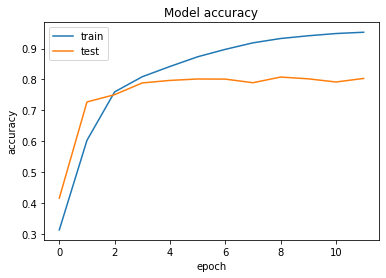

In [42]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
# Create function to plot training graph:
def plot_graph(history, history2, title, xlabel, ylabel):
  plt.plot(hist.history[history])
  plt.plot(hist.history[history2])
  plt.title(title)
  plt.ylabel(xlabel)
  plt.xlabel(ylabel)
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

# Plot accuracy
plot_graph('accuracy', 'val_accuracy', 'Model accuracy', 'accuracy', 'epoch')

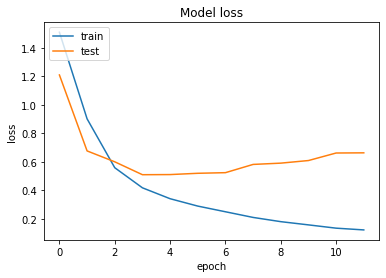

In [43]:
# Plot loss
plot_graph('loss', 'val_loss', 'Model loss', 'loss', 'epoch')

# Prediction Test

In [44]:
# Prepare text to feed to model
sentence = ["Cristiano Ronaldo just score a goal"]
sentence_seq = tokenizer.texts_to_sequences(sentence)
sentence_pad = pad_sequences(sentence_seq)

# Try prediction
prediction = model.predict(sentence_pad)

In [45]:
prediction

array([[7.92442763e-04, 9.66702937e-05, 1.34833646e-03, 9.16730642e-01,
        8.09301734e-02, 1.01685844e-04]], dtype=float32)